# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

In [12]:
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

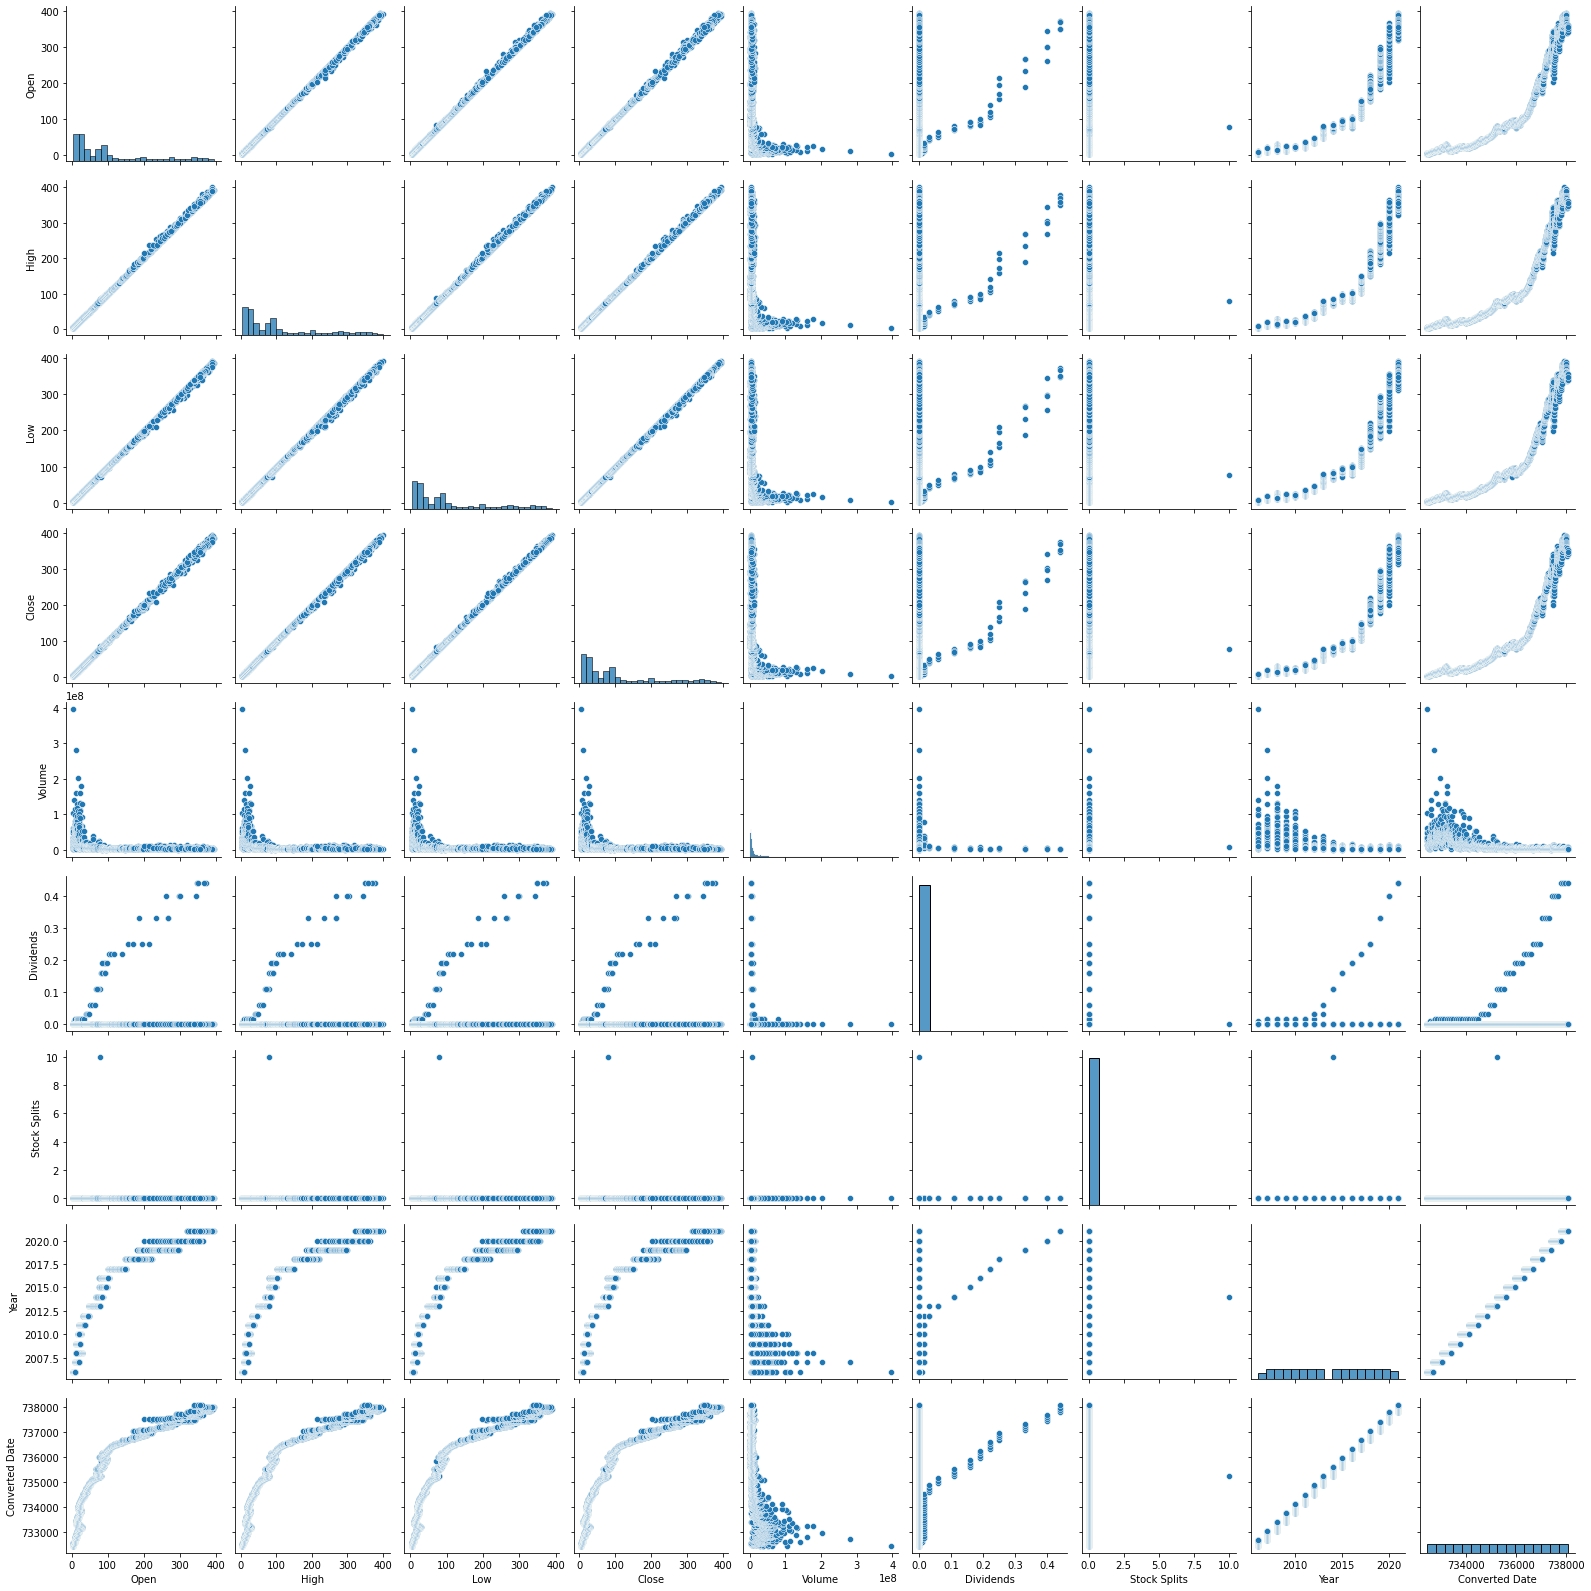

In [2]:
sb.pairplot(stocks_df)

<AxesSubplot:>

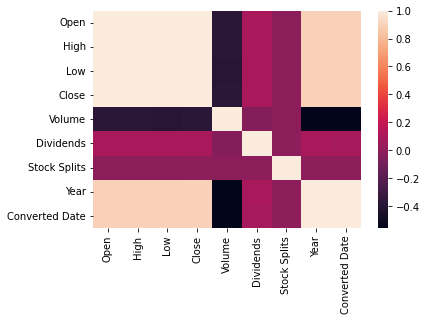

In [13]:
sb.heatmap(stocks_df.corr())

In [14]:
#sb.heatmap(stocks_df)
# float() argument must be a string or a number, not 'Timestamp'

In [8]:
#plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [15]:
X = stocks_df['Dividends'] 

y = stocks_df['High']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [16]:
# create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [17]:
X_train

2457    0.0
1540    0.0
384     0.0
2560    0.0
3320    0.0
       ... 
1930    0.0
79      0.0
1859    0.0
2840    0.0
1544    0.0
Name: Dividends, Length: 2710, dtype: float64

In [18]:
y_train

2457     87.057136
1540     42.189558
384      18.792144
2560     91.465715
3320    259.651178
           ...    
1930     75.256852
79        6.283938
1859     65.664568
2840    130.649604
1544     40.420487
Name: High, Length: 2710, dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [19]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const        106.988304
Dividends    401.654076
dtype: float64

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

In [24]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   High   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     31.93
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.76e-08
Time:                        20:24:10   Log-Likelihood:                -16535.
No. Observations:                2710   AIC:                         3.307e+04
Df Residuals:                    2708   BIC:                         3.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.9883      2.086     51.297      0.000     102.899     111.078
Dividends    401.6541     71.076      5.651      0.000     262.285     541.023
==============================================================================
Omnibus:                      411.877   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.375
Skew:                           1.178   Prob(JB):                    3.55e-137
Kurtosis:                       3.123   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

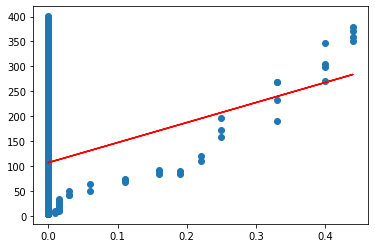

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 106.988304 + 401.654076*X_train, 'r')
plt.show()


## Error Terms
With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

c:\users\kdh\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


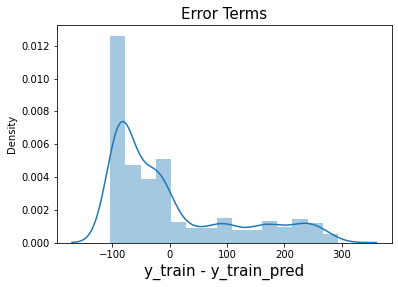

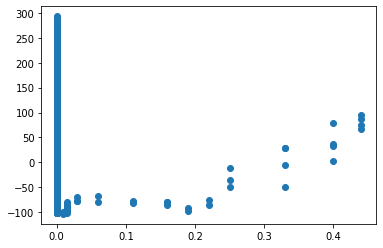

In [23]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)


fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

plt.scatter(X_train,res)
plt.show()


Now plot the residuals. Did you get a bell curve?

In [27]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

2424    106.988304
2643    106.988304
2501    106.988304
2044    106.988304
288     106.988304
           ...    
2219    106.988304
2875    106.988304
531     106.988304
2844    106.988304
2689    106.988304
Length: 1162, dtype: float64

In [28]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

r_squared

-0.00605019097560433

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?
<br><br>No, R-squared value was far below 0.7<br><br>
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 
<br><br>R-squared value indicates the model is unstable.<br>